# CSE 5243 - Introduction to Data Mining
## Homework 1: Exploratory Data Analysis
- Semester: Spring 2021
- Instructor: Vedang Patel
- Section: Tuesday/Thursday 9:35AM
- Student Name: Ryan Stuckey
- Student Email: stuckey.87@osu.edu
- Student ID: 500201211

Template Version V2.(Adopted from Prof. Tom Bihari's version)
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import texttable as tt
import hw1 


data = hw1.data()


***
# Section: 1 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class.
***

***
## Section: 1.1 - Describe the meaning and type of data for each attribute.
***

- Date (day/month/year)- date of recorded data point
- Rented Bike Count (# bikes)- number of bikes rented that hour
- Temperatue (°Celsius)- average temperature for that hour
- Humidity (%)- average percent humidty for that hour
- Wind Speed (meters/second)- average wind speed for that hour
- Visibility (10 meters)- average visibility for that hour
- Dew Point Temperatue (°Celsius)- average temperature at which dew formed that hour
- Solar Radiation (Megejoules/ square meter)- average energy emitted by sun in a square meter that hour
- Rainfall (millimeters)- amount of rain that fell that hour
- Snowfall (centimeters)- amount of snow that fell that hour
- Holiday (No Holiday/Holiday)- Holiday if a holiday occurred that day, else No Holiday
- Functioning Day (Yes/No)- Yes if the bike rental is running that day, else No
- IsItDay (True/False)- True if it was daytime (light outside) during that hour, else False

---
***
## Section: 1.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [2]:
hw1.print_section_1_2_stats(data)

---Basic Data Statistics---
Entries: 7358

--- Rented Bike Count ---
Mean: 708.626257135091
Std. Dev.: 649.7061658718347
Mode: 0
Median: 505.5
Min: 0
Max: 3556
10th Percentile:64.70000000000005
90th Percentile:1693.0

--- Temperature(C) ---
Mean: 12.825523240010872
Std. Dev.: 11.939273801245958
Mode: 19.1
Median: 13.5
Min: -17.8
Max: 39.4
10th Percentile:-3.7
90th Percentile:28.0

--- Humidity(%) ---
Mean: 58.36626800761076
Std. Dev.: 20.3533015908715
Mode: 97
Median: 57.0
Min: 0
Max: 98
10th Percentile:32.0
90th Percentile:86.0

--- Wind speed (m/s) ---
Mean: 1.7210519162815983
Std. Dev.: 1.0349255822234353
Mode: 1.1
Median: 1.5
Min: 0.0
Max: 7.4
10th Percentile:0.6
90th Percentile:3.2

--- Visibility (10m) ---
Mean: 1433.324408806741
Std. Dev.: 608.9114255669454
Mode: 2000
Median: 1690.0
Min: 27
Max: 2000
10th Percentile:434.70000000000005
90th Percentile:2000.0

--- Dew point temperature(C) ---
Mean: 4.088148953519979
Std. Dev.: 13.006531052469724
Mode: 0.0
Median: 5.05
Min: -30.6
M

---
***
## Section: 1.3 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

### Bike Rentals In Each Season
I chose this plot because it helps visualize the number of bikes sold in each season. While it does not help us pick out anything specific like outliers or dirty data, it does lead to a few different things:

1. Current season appears to play a heavy role in number of bikes rented out.
2. Winter is the least popular season for bike rentals, which is expected due to cold weather and snow.

However, these cannot yet be confirmed without further analysis. Further below, in Section 1.5, I focus more on how two attributes relate to each other.

Text(0.5, 1.0, 'Bikes Rented In Each Season')

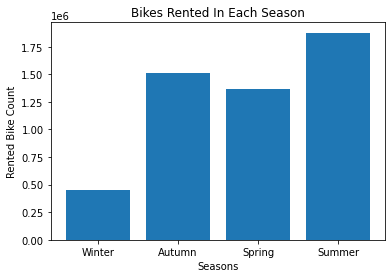

In [3]:
x, y = 'Seasons', 'Rented Bike Count'
d = hw1.sum_by_categories_to_dict(data, y, x)
plt.bar(x=[key for key in d.keys()], height=[key for key in d.values()])
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bikes Rented In Each Season')

---
### Bike Rentals and Date
I chose this graph because I believe that the number of bikes rented will go hand in hand with what the current date is during a given year. I chose only to show data from 2018, as the data from 2017 does not cover a full year and the dates are not the same for each year, so summing the number of bikes rented from the same data on each year would distort the data. Additionally, plotting the data in this way will allow me to visualize some potentially incorrect data (i.e. erroneous values) or outliers, which is discussed more in the next section. The trend here is hard to see, as the data is spread all over, but after examining the graph one can see how the numbers of bikes increases up until the middle of the year and then slowly descreases. This trend will be more emphasized after I do some data cleaning in Section 2.

Text(0.5, 1.0, 'Bike Rentals vs. Date')

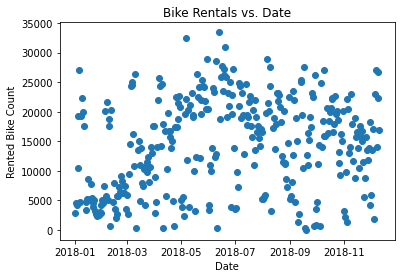

In [4]:
x, y = 'Date', 'Rented Bike Count'
d=hw1.sum_by_categories_to_dict(data, y, x) # sum number of bikes sold in each day
d=hw1.keep_keys(d, lambda timestamp, year : timestamp.year==year, 2018) # keep only keys from 2018
plt.scatter(x=[key for key in d.keys()], y=[val for val in d.values()])
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bike Rentals vs. Date')

---
### Bike Rentals and Temperature
I chose to visualize this data because I believe that temperate will play the biggest role in the number of bikes rented in a given timespan. 

Text(0.5, 1.0, 'Bike Rentals vs. Temperature')

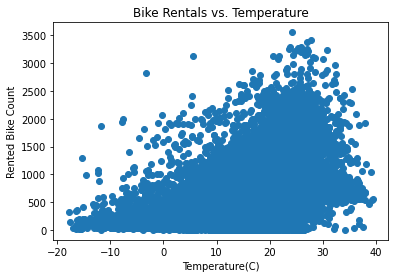

In [5]:
x, y = 'Temperature(C)', 'Rented Bike Count'
plt.scatter(x=data[x], y=data[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bike Rentals vs. Temperature')

---
***
## Section: 1.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

### General Process
To find the outliers for a given set of data, I:

1. Sort each piece into a dictionary, with the key being the date and the value being a list of outliers. 
2. Iterate over dictionary. For each list, find the outliers via my function hw1.find_outliers and then move this into another dictionary, with the key being the data and the value being the dictionary returned by **hw1.find_outliers**. Outlier function was built using the 1.5xIQR rule found [here on Khan Academy](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule).
3. Summarize results. Add up the total number of outliers, day with most/least outliers, etc.

---
### Outliers in Daily Temperature
First, I want to find outliers in daily temperatures. These outliers will mess with any prediction algorithms later and can be eliminated or changed to a reasonable value- like the mean- after we pick them out. 

I wanted to pick out outliers on each day instead of on the entire data set. Picking out outliers for each day individually means we are more likely to find outliers because the temperature over the course of a single day will not change that much relative to the temperature over the course of an entire year.

In [6]:
hw1.print_section_1_4_outliers(data, 'Temperature(C)', 'Date')

+-----------------------------+-------+
|                             | Count |
+=============================+=======+
| Total Outliers:             |  270  |
+-----------------------------+-------+
| Max Outliers In a Day:      |   8   |
+-----------------------------+-------+
| Number of Days w/ Outliers: |  180  |
+-----------------------------+-------+
| Number Days Examined:       |  365  |
+-----------------------------+-------+


---
### Outliers in Number of Bikes Rented
Another important place to look for outliers is in the number of bikes rented. This is important, as this number is heavily dependent on data, season, and precipitation. 

I again picked out outliers on a day-by-day basis for bike rental count, as the number of bikes rented will have a wide range throughout the year depending on the season. While it 

In [7]:
hw1.print_section_1_4_outliers(data, 'Rented Bike Count', 'Date')

+-----------------------------+-------+
|                             | Count |
+=============================+=======+
| Total Outliers:             |  249  |
+-----------------------------+-------+
| Max Outliers In a Day:      |   4   |
+-----------------------------+-------+
| Number of Days w/ Outliers: |  153  |
+-----------------------------+-------+
| Number Days Examined:       |  365  |
+-----------------------------+-------+


---
### Outliers in Rainfall and Snowfall
For outliers in rainfall and snowfall, I only wanted to consider the entries with non-zero values. This is because most entries have a value of 0, so including these would not allow me accurately identify all the outliers. As mentioned previosly, I am using the 1.5xIQR method to find outliers. This method classifies a number as an outlier if it lies outside a range determined by the first and third quartiles (or 25th and 75th percentiles). The first and third quartiles for the rainfall and snow fall are:

In [8]:
print("Rainfall 1st Quartile:", data['Rainfall(mm)'].quantile(0.25))
print("Rainfall 3rd Quartile:", data['Rainfall(mm)'].quantile(0.75))
print("Snowfall 1st Quartile:", data['Snowfall (cm)'].quantile(0.25))
print("Snowfall 3rd Quartile:", data['Snowfall (cm)'].quantile(0.75))

Rainfall 1st Quartile: 0.0
Rainfall 3rd Quartile: 0.0
Snowfall 1st Quartile: 0.0
Snowfall 3rd Quartile: 0.0


As seen, the quartiles are skewed by the large amount of zero-values. This results in every non-zero value being considered an outlier. By only including the non-zero values, our outliers become:

In [9]:
print("Rainfall 1st Quartile:", pd.Series([val for val in data['Rainfall(mm)'] if val != 0]).quantile(0.25))
print("Rainfall 3rd Quartile:", pd.Series([val for val in data['Rainfall(mm)'] if val != 0]).quantile(0.75))
print("Snowfall 1st Quartile:", pd.Series([val for val in data['Snowfall (cm)'] if val != 0]).quantile(0.25))
print("Snowfall 3rd Quartile:", pd.Series([val for val in data['Snowfall (cm)'] if val != 0]).quantile(0.75))

Rainfall 1st Quartile: 0.5
Rainfall 3rd Quartile: 2.5
Snowfall 1st Quartile: 0.5
Snowfall 3rd Quartile: 2.05


The outliers for the rainfall and snow fall can be sceen below. These outliers are based only on the non-zero values for rain and snowfall.

In [10]:
rain_outliers = hw1.find_outliers(pd.Series([val for val in data['Rainfall(mm)'] if val != 0]), hw1.is_outlier)
snow_outliers = hw1.find_outliers(pd.Series([val for val in data['Snowfall (cm)'] if val != 0]), hw1.is_outlier)

print("---Rainfall Outliers---")
print("Averag Non-zero Rainfall:", rain_outliers['Mean'])
print("Number of outliers:", rain_outliers['Outliers Count'])
print("Min Outlier:", rain_outliers['Min Outlier'])
print("Max Outlier:", rain_outliers['Max Outlier'])
print("Avg. Outlier:", rain_outliers['Avg. Outlier'])
print()

print("---Snowfall Outliers---")
print("Average Non-zero Snowfall:", snow_outliers['Mean'])
print("Number of outliers:", snow_outliers['Outliers Count'])
print("Min Outlier:", snow_outliers['Min Outlier'])
print("Max Outlier:", snow_outliers['Max Outlier'])
print("Avg. Outlier:", snow_outliers['Avg. Outlier'])


---Rainfall Outliers---
Averag Non-zero Rainfall: 2.3075688073394494
Number of outliers: 40
Min Outlier: 6.0
Max Outlier: 35.0
Avg. Outlier: 11.4925

---Snowfall Outliers---
Average Non-zero Snowfall: 1.4216
Number of outliers: 9
Min Outlier: 4.8
Max Outlier: 8.8
Avg. Outlier: 6.377777777777777


---
***
## Section: 1.5 - Explore the relationships among the attributes, excluding the class attribute.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

### Comparing Time of Year and Number of Bike Rentals
As discussed in Section 1.3, I think the time of the year will be one of the key factors in determing how many bikes will be rented out. Two attributes can be used to get time of the year- the date and the season. I will remove outliers for the number of rented bikes and then re-analyze the data. To analyze the relationship between date and bike rentals, I have created a correlation matrix and a scatter plot to visualize the data.

In [11]:
x, y = 'Date', 'Rented Bike Count'
bikes_rented_date = hw1.sort_by_categories_to_dict(data, y, x)
outliers_removed = 0
for date in bikes_rented_date:
    bikes_rented_date[date] = [val for val in hw1.remove_outliers(pd.Series(bikes_rented_date[date]), hw1.is_outlier)[0]]
    bikes_rented_date[date] = sum(bikes_rented_date[date])
date_series, bike_series = pd.Series(data=[day.day_of_year for day in bikes_rented_date.keys()], name=x),pd.Series(data=bikes_rented_date.values(), name=y)
df = pd.DataFrame(data={date_series.name:date_series, bike_series.name:bike_series})
corr = df.corr()
table = tt.Texttable()
table.add_rows([['', x], [y, corr[y][x]]])
table.set_cols_align(['l', 'c'])
print(table.draw())

+-------------------+-------+
|                   | Date  |
+===================+=======+
| Rented Bike Count | 0.080 |
+-------------------+-------+


#### Problems with Dates and Correlation
After building the correlation matrix, I realized that the correlation of the date vs. the bike rentals will not be a good representation, as the peak of bike rentals will likely be during the middle of the year. So even though the bike rentals do depend on the data, the correlation matrix does not reflect this. The relationship between the date and the number of bikes rented can be better seen with the scatter plot below:

Text(0, 0.5, 'Rented Bike Count')

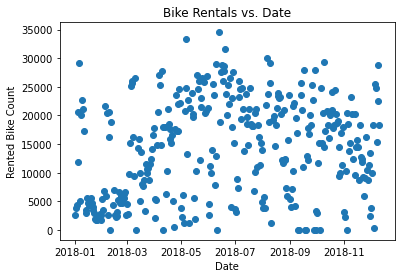

In [12]:
bikes_rented_date_without_2018 = hw1.keep_keys(bikes_rented_date, lambda timestamp, year : timestamp.year == year, 2018)
plt.scatter(x=[x for x in bikes_rented_date_without_2018.keys()], y=[y for y in bikes_rented_date_without_2018.values()])
plt.title('Bike Rentals vs. Date')
plt.xlabel(x)
plt.ylabel(y)

---
### Analyzing the Weather and Bike Rentals

Precipitation and the number of bike rentals should be easier to analyze, as one would expect a negative correlation between the amount of precipitation and number of bikes rented. Additionally, one could anticipate a positive correlation between the temperature and the number of bike rentals, as people are more likely to rent a bike if it is warm outisde. To start off, I will create a correlation matrix between the snowfall, rainfall, temperature and number of bikes rented.

In [13]:
y, x1, x2, x3 = 'Rented Bike Count', 'Rainfall(mm)', 'Snowfall (cm)', 'Temperature(C)'
df_precip_bikes = pd.DataFrame(data = {y:data[y], x1:data[x1], x2:data[x2], x3:data[x3]})
corr = df_precip_bikes.corr()
table = tt.Texttable()
table.add_rows([['', x1, x2, x3], [y, corr[y][x1], corr[y][x2], corr[y][x3]]])
table.set_cols_align(['l', 'c', 'c', 'c'])
print(table.draw())

+-------------------+--------------+---------------+----------------+
|                   | Rainfall(mm) | Snowfall (cm) | Temperature(C) |
+===================+==============+===============+================+
| Rented Bike Count |    -0.115    |    -0.136     |     0.507      |
+-------------------+--------------+---------------+----------------+


#### Analysis
As expected, a correlation exists between rented bike count and rainfall, snowfall, and temperature. Between precipitation and bike rentals, a negative correlation exists, meaning as precipitation increases, bike rentals decrease. And, between temperature and bike rentals, a strong positive correlation exists, meaning bike rentals increase as temperature increase. However, it would be notable to see how many data entries had some precipitation, as most days likely had no precipitation at all.

In [14]:
snow_days, rain_days = len([day for day in data['Snowfall (cm)'] if day > 0]) ,len([day for day in data['Rainfall(mm)'] if day > 0])
print("Number days with rain: ", rain_days, '/', len(data), sep = '')
print("Number days with snow: ", snow_days, '/', len(data), sep = '')
print("Number days with precipitation: ", snow_days + rain_days, '/', len(data), sep = '')


Number days with rain: 436/7358
Number days with snow: 375/7358
Number days with precipitation: 811/7358


While there are a decent amount of days with some precipitation, the number of recorded days with actual precipitation is still important to keep in mind, as the correlation is relatively low, as seen above. However, one would anticipate that rain or snow would play a big role in how many bikes are rented and that the correlation would be higher. Most people would not be as likely to rent a bike if the conditions outside are not ideal.

These findings are significant because it means we might be able to use them when developing our final data model in Section 2. If we know that rainfall, snowfall, and temperatue affect the number of bikes rented, those are attributes we will want to retain in our final data model.

Looking at the graphs for each of these reveals the same information. In each graph, we can see how our observations hold.

Text(0.5, 1.0, 'Rented Bike Count vs. Rainfall(mm)')

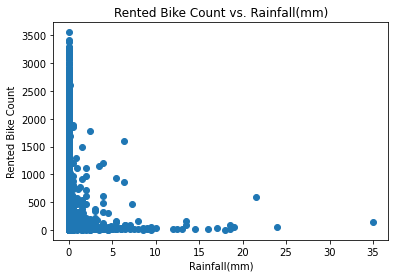

In [15]:
plt.scatter(x=data[x1], y=data[y])
plt.xlabel(x1)
plt.ylabel(y)
plt.title(str(y + ' vs. ' + x1))

Text(0.5, 1.0, 'Rented Bike Count vs. Snowfall (cm)')

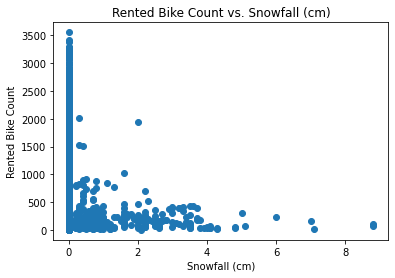

In [16]:
plt.scatter(x=data[x2], y=data[y])
plt.xlabel(x2)
plt.ylabel(y)
plt.title(str(y + ' vs. ' + x2))

### Comparing Bike Rentals and Humidity

Previously we found there was a correlation between bike rentals and the weather. However, we cannot say that the specific weather causes changes in bike rentals without doing some more analysis as there could be other factors that affect bike rentals. In this section, I am going to calculate correlation and then visualize the relation between bike rentals and humidty.

In [17]:
y, x = 'Rented Bike Count', 'Humidity(%)'
df_humid_bike = pd.DataFrame(data = {y:data[y], x:data[x]})
corr = df_humid_bike.corr()
table = tt.Texttable()
table.add_rows([['', x], [y, corr[y][x]]])
table.set_cols_align(['l', 'c'])
print(table.draw())

+-------------------+-------------+
|                   | Humidity(%) |
+===================+=============+
| Rented Bike Count |   -0.191    |
+-------------------+-------------+


Text(0.5, 1.0, 'Rented Bike Count vs. Humidity(%)')

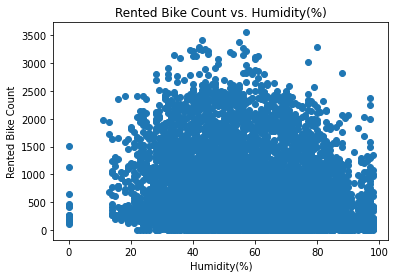

In [18]:
plt.scatter(x=data[x], y=data[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(str(y + ' vs. ' + x))

#### Analysis
This initial analysis of the relationship between humidity and bike rental would suggest a negative correlation between the two. However, it could be that there are other factors that affect both the humidty and the bike rentals. Humidity is based on dew point and temperature, so I am going to analyze the relationship between humidity, dew point, and temperature.

In [19]:
y, x1, x2, x3, bike = 'Humidity(%)', 'Dew point temperature(C)', 'Temperature(C)', 'Temperature - Dew Point', 'Rented Bike Count'
series_temp_minus_dewpoint = pd.Series([row[3] - row[7] for row in data.itertuples()])
df_humid_temp_dewpoint = pd.DataFrame(data = {y:data[y], x1:data[x1], x2:data[x2], x3:series_temp_minus_dewpoint, bike:data[bike]})
corr = df_humid_temp_dewpoint.corr()
table = tt.Texttable()
table.add_rows([['', x1, x2, x3, y], [y, corr[y][x1], corr[y][x2], corr[y][x3], ''], [x1, '', corr[x1][x2], '', ''], [bike, corr[bike][x1], corr[bike][x2], corr[bike][x3], corr[bike][y]]])
table.set_cols_align(['l', 'c', 'c', 'c', 'c'])
print(table.draw())

+----------------+---------------+---------------+---------------+-------------+
|                | Dew point tem | Temperature(C | Temperature - | Humidity(%) |
|                |  perature(C)  |       )       |   Dew Point   |             |
+================+===============+===============+===============+=============+
| Humidity(%)    |     0.498     |     0.141     |    -0.731     |             |
+----------------+---------------+---------------+---------------+-------------+
| Dew point      |               |     0.865     |               |             |
| temperature(C) |               |               |               |             |
+----------------+---------------+---------------+---------------+-------------+
| Rented Bike    |     0.356     |     0.507     |     0.216     |   -0.191    |
| Count          |               |               |               |             |
+----------------+---------------+---------------+---------------+-------------+


#### Analysis
The above correlations suggest a few different things. The correltations between humidity, dew point temperatue, and temperature are to be expected, as humidty is determined by humidity and temperature. Additionally, the positive correlation between humidity and temperature and dew point show that humidity is affected by both temperature and dew point. Because humidity is affected by both temperature and dew point and by looking at the correlation between temperature and rented bike count, we can determine that humidity does not play that big a role in the rented bike count.

---
### Visibility
Next, I want to analyze visibility and see how it affects the data. The relation between visibility and rented bike count can be scene below.

In [20]:
y, x, rain, snow = 'Rented Bike Count', 'Visibility (10m)', 'Rainfall(mm)', 'Snowfall (cm)'
df_bike_visibility = pd.DataFrame(data={y:data[y], x:data[x], rain:data[rain], snow:data[snow]})
corr = df_bike_visibility.corr()
table = tt.Texttable()
table.add_rows([['', x, rain, snow], [y, corr[y][x], corr[y][rain], corr[y][snow]], [rain, corr[rain][x], '', ''], [snow, corr[snow][x], '', '']])
table.set_cols_align(['l', 'c', 'c', 'c'])
print(table.draw())

+-------------------+------------------+--------------+---------------+
|                   | Visibility (10m) | Rainfall(mm) | Snowfall (cm) |
+===================+==================+==============+===============+
| Rented Bike Count |      0.193       |    -0.115    |    -0.136     |
+-------------------+------------------+--------------+---------------+
| Rainfall(mm)      |      -0.155      |              |               |
+-------------------+------------------+--------------+---------------+
| Snowfall (cm)     |      -0.114      |              |               |
+-------------------+------------------+--------------+---------------+


#### Analysis
The correlation between visibility and the rented bike count suggest that it plays a role in how many bikes are rented out. However, we can also conclude that visibility is affect by both the amount of snow or rain falling. The correlation tells us this and this also makes sense logically. From all this, it is likely that rain and snow will play a bigger role in the rented bike count. The correlation between rented bike count and visibility may be higher that that of rented bike count and precipitation because there is more data on visibility than there is on precipitation. This is seen in the table:

In [21]:
snow_days, rain_days, vis_days = len([day for day in data['Snowfall (cm)'] if day > 0]) ,len([day for day in data['Rainfall(mm)'] if day > 0]), len([day for day in data['Visibility (10m)'] if day < 2000])
print("Number days with rain: ", rain_days, '/', len(data), sep = '')
print("Number days with snow: ", snow_days, '/', len(data), sep = '')
print("Number days with visibility < 2000 (max value): ", vis_days, '/', len(data), sep = '')

Number days with rain: 436/7358
Number days with snow: 375/7358
Number days with visibility < 2000 (max value): 5511/7358


### Solar Radiation and Bike Rentals
For this comparison, I want to see how solar radiation and bike rentals are related. I will start by getting the correlation between the two variables:


In [22]:
bike, sol_rad = 'Rented Bike Count', 'Solar Radiation (MJ/m2)'
df_bike_sol = pd.DataFrame(data={bike:data[bike], sol_rad:data[sol_rad]})
corr = df_bike_sol.corr()
table = tt.Texttable()
table.add_rows([['', sol_rad], [bike, corr[bike][sol_rad]]])
table.set_cols_align(['l', 'c'])
print(table.draw())

+-------------------+-------------------------+
|                   | Solar Radiation (MJ/m2) |
+===================+=========================+
| Rented Bike Count |          0.238          |
+-------------------+-------------------------+


Initial results suggest a strong correlation between the two. Let's also look at correlation between some other attributes to see what how those compare.

In [23]:
bike, sol_rad, rain, snow, temp = 'Rented Bike Count', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Temperature(C)'
df_bike_sol = pd.DataFrame(data={bike:data[bike], sol_rad:data[sol_rad], rain:data[rain], snow:data[snow], temp:data[temp]})
corr = df_bike_sol.corr()
table = tt.Texttable()
table.add_rows([['', sol_rad, rain, snow, temp], [bike, corr[bike][sol_rad], corr[bike][rain], corr[bike][snow], corr[bike][temp]], [sol_rad, '', corr[sol_rad][rain], corr[sol_rad][snow], corr[sol_rad][temp]]])
table.set_cols_align(['l', 'c', 'c', 'c', 'c'])
print(table.draw())

+---------------+---------------+--------------+---------------+---------------+
|               |     Solar     | Rainfall(mm) | Snowfall (cm) | Temperature(C |
|               |   Radiation   |              |               |       )       |
|               |    (MJ/m2)    |              |               |               |
+===============+===============+==============+===============+===============+
| Rented Bike   |     0.238     |    -0.115    |    -0.136     |     0.507     |
| Count         |               |              |               |               |
+---------------+---------------+--------------+---------------+---------------+
| Solar         |               |    -0.070    |    -0.071     |     0.334     |
| Radiation     |               |              |               |               |
| (MJ/m2)       |               |              |               |               |
+---------------+---------------+--------------+---------------+---------------+


#### Analysis
In the table above, we can see that the correlation between solar radiation and the precipitation is relatively week. However, the correlation with temperature and solar radiation is strong.

### Function Day and Bike Rental
For my last analysis, I just want to see how bike rental and functioning day relate. First, I'll analyze the correlation.

In [24]:
bike, func_day = 'Rented Bike Count', 'Functioning Day'
df_bike_func = pd.DataFrame(data={bike:data[bike], func_day:data[func_day]})
corr = df_bike_func.corr()
table = tt.Texttable()
table.add_rows([['', func_day], [bike, corr[bike][func_day]]])
table.set_cols_align(['l', 'c'])
print(table.draw())

+-------------------+-----------------+
|                   | Functioning Day |
+===================+=================+
| Rented Bike Count |      0.191      |
+-------------------+-----------------+


This is a higher correlation than I anticipated, as I had assumed functioning day means true if the bike rentals are open, so I'm going to check the total bikes rented when functioning day is true and when it is false.

In [25]:
sums = hw1.sum_by_categories_to_dict(data, bike, func_day)
table = tt.Texttable()
table.add_rows([[func_day, bike], ['True', sums[True]], ['False', sums[False]], ['Percent False', 100 * sums[False]/sums[True]]])
table.set_cols_align(['l', 'c'])
print(table.draw())

+-----------------+-------------------+
| Functioning Day | Rented Bike Count |
+=================+===================+
| True            |      5205554      |
+-----------------+-------------------+
| False           |       8208        |
+-----------------+-------------------+
| Percent False   |       0.158       |
+-----------------+-------------------+


### Analysis
The percent of closed days that had bikes rented out is less than 1%. This likely suggest that any entry with a bike count greater than 0 and a false value for FunctioningDay is errorneous. As a result, if we were predicting how many bikes would be rented out in a given day, we would want to remove data entries for which FunctioningDay is false.

---
***
## Section: 1.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier visualizations or create new ones.
***

### Initial Calculations
To start out, I just want to calculate how many data entries were taken during the day (i.e. IsItDay = 1).

In [26]:
num_day = len([d for d in data.itertuples() if d[14] == True])
table = tt.Texttable()
table.add_rows([['', 'Count'], ['Number Daytime Entries', num_day], ['Number Nighttime Entries', len(data) - num_day]])
table.set_cols_align(['l', 'c'])
print(table.draw())

+--------------------------+-------+
|                          | Count |
+==========================+=======+
| Number Daytime Entries   | 3369  |
+--------------------------+-------+
| Number Nighttime Entries | 3989  |
+--------------------------+-------+


As seen above, the number of daytime and nighttime entries is fairly balance, meaning we should be able to get a good idea of how this attribute relates to other attributes.

### Comparing Bikes Rented Out and Is It Day
For initial predictions, I think we will see a strong positive correlation here. Is It Day has a value of 1 (True) when it is daytime. We would expect that more bikes would be rented out at day than during night. First, I'll start with correlation:

In [27]:
bike, day = 'Rented Bike Count', 'IsitDay'
corr = pd.DataFrame(data={bike:data[bike], day:data[day]}).corr()
table = tt.Texttable()
table.add_rows([['', bike], [day, corr[day][bike]]])
table.set_cols_align(['l','c'])
print(table.draw())

+---------+-------------------+
|         | Rented Bike Count |
+=========+===================+
| IsitDay |       0.192       |
+---------+-------------------+


Text(0.5, 1.0, 'Bikes Rented in Daytime and Nighttime')

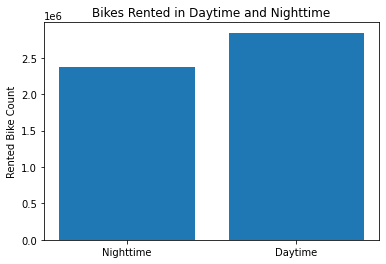

In [28]:
bike_day_cnt = hw1.sum_by_categories_to_dict(data, bike, day)
plt.bar(x=[x for x in bike_day_cnt.keys()], height=[y for y in bike_day_cnt.values()])
plt.xticks([0,1], ['Nighttime', 'Daytime'])
plt.ylabel(bike)
plt.title('Bikes Rented in Daytime and Nighttime')

The slightly higher number of bikes rented during the day versus at night time supports the above correlation. Since the number of data points taken during the day and night was approximately equal, we'd expect that there are more daytime bike rentals than nighttime bike rentals.

The slightly higher number of bikes rented during the day versus at night time supports the above correlation. Since the number of data points taken during the day and night was approximately equal, we'd expect that there are more daytime bike rentals than nighttime bike rentals.

#### Analysis
While there is a fairly strong positive correlation between these two, meaning more bikes are rented during the day, it appears that people still rent bikes at night. Thus, the number of bikes rented cannot be soley used to predict whether or not it is daytime.

### Comparing Weather and Is It Day
For this comparision, we'll be looking at how the weather (i.e. temperature, rainfall, and snowfall) and IsitDay relate. In theory, the correlation between temperature and IsItDay should be stronger, as temperature go down at nighttime. Concerning precipitation, the correltation between it and ItIsDay should be week.

To analyze the correlation for temperature and IsItDay, I am going to split the temperatures up by day and then analyze the correlation for each day. This is necessary because the average temperature tends to rise and fall depending on the time of the year.

In [29]:
weather_date_dict, day_date_dict = hw1.sort_by_categories_to_dict(data, 'Temperature(C)', 'Date'), hw1.sort_by_categories_to_dict(data, 'IsitDay', 'Date')
df_dict = {}
for date in weather_date_dict.keys():
    df_dict[date] = pd.DataFrame(data={'Temperature(C)':weather_date_dict[date], 'IsitDay':day_date_dict[date]}).corr()['Temperature(C)']['IsitDay']

corr_series = pd.Series([c for c in df_dict.values()]) # put correlations in list
table = tt.Texttable()
table.add_rows([['', 'Correlation'], 
                ['Avg', corr_series.mean()], 
                ['St. Dev.', corr_series.std()], 
                ['Max', corr_series.max()], 
                ['Min', corr_series.min()], 
                ['1st Quartile', corr_series.quantile(0.25)], 
                ['Median', corr_series.median()],
                ['3rd Quantile', corr_series.quantile(0.75)]])
table.set_cols_align(['l','c'])
print('Correlations on Temperatures for Each Day')
print(table.draw())

Correlations on Temperatures for Each Day
+--------------+-------------+
|              | Correlation |
+==============+=============+
| Avg          |    0.409    |
+--------------+-------------+
| St. Dev.     |    0.282    |
+--------------+-------------+
| Max          |    0.864    |
+--------------+-------------+
| Min          |   -0.792    |
+--------------+-------------+
| 1st Quartile |    0.216    |
+--------------+-------------+
| Median       |    0.458    |
+--------------+-------------+
| 3rd Quantile |    0.631    |
+--------------+-------------+


After calculating the correlations for the temperature each day, I calcuated some basic statistical information about it. The average and a fairly low standard deviation suggest the correlation for each day is fairly accurate. Fluctuations in correlations, like the max of 0.864 and the min of -0.792 can be attributed to erroneous temperature values. The positively correlated average suggest that higher temperatures occur when IsitDay is True (i.e. during the daytime).

#### Analyzing the Precipitation and IsitDay
Next I am going to look at the correlation between the precipiation and ItitDay. In theory, we should see little to no correlation here because it can precipiate in the daytime or nighttime.

In [32]:
rain, snow, day = 'Rainfall(mm)', 'Snowfall (cm)', 'IsitDay'
corr = pd.DataFrame(data={rain:data[rain], snow:data[snow], day:data[day]}).corr()
table = tt.Texttable()
table.add_rows([['', day],
                [snow, corr[snow][day]],
                [rain, corr[rain][day]]])
table.set_cols_align(['l','c'])
print(table.draw())

+---------------+---------+
|               | IsitDay |
+===============+=========+
| Snowfall (cm) |  0.004  |
+---------------+---------+
| Rainfall(mm)  |  0.016  |
+---------------+---------+


As predicted, the precipitation amount and IsitDay attributes have a very low correltation. Thus, the rainfall and snowfall attributes could potentially be eliminated in our final data set if we're trying to predict IsitDay.

---
### Comparing Solar Radiation and IsitDay
Solar radiation is the amount of energy given off by the sun in a specific area. Because of this, we would expect solar radiation and IsitDay to have a high, positive correlation and solar radiation would be a good attribute to use if prediciting IsitDay. The correlation is:

In [39]:
sol_rad, day = 'Solar Radiation (MJ/m2)', 'IsitDay'
corr = pd.DataFrame(data={sol_rad:data[sol_rad], day:data[day]}).corr()
table = tt.Texttable()
table.add_rows([['', day],
                [sol_rad, corr[sol_rad][day]]])
table.set_cols_align(['l', 'c'])
print(table.draw())

+-------------------------+---------+
|                         | IsitDay |
+=========================+=========+
| Solar Radiation (MJ/m2) |  0.649  |
+-------------------------+---------+


As predicted, the solar radiation and IsitDay have a strong, positive correlation. This means that there is more sun during the daytime. One might expect this to be higher, as the sun comes out every day (even if it is behind clouds). To test this, we can check the correlation between solar radiation and the IsitDay attributes with only data entries with no precipitation.

In [50]:
no_precip_df = pd.DataFrame(data=[t for t in data.itertuples() if t[9] == 0 and t[10] == 0], columns=[''].append(data.columns))
print("Eliminated values count:", len(data) - len(no_precip_df))
corr = pd.DataFrame(data={sol_rad:no_precip_df['_8'], day:no_precip_df[day]}).corr()
table = tt.Texttable()
table.add_rows([['', day],
                [sol_rad, corr[sol_rad][day]]])
table.set_cols_align(['l', 'c'])
print(table.draw())

Eliminated values count: 786
+-------------------------+---------+
|                         | IsitDay |
+=========================+=========+
| Solar Radiation (MJ/m2) |  0.673  |
+-------------------------+---------+


I found this interesting; I figured that eliminating values with no precipitation would cause a bigger change in the correlation.

---
### Humidity and IsitDay
Next I want to analyze the relationship between the humidity and IsitDay attributes. I am guessing humidity will go down at nighttime because temperature tends to go down at nighttime.


In [56]:
vis, day = 'Humidity(%)', 'IsitDay'
corr = pd.DataFrame(data={hum:data[hum], day:data[day]}).corr()
table = tt.Texttable()
table.add_rows([['', day],
                [hum, corr[hum][day]]])
table.set_cols_align(['l', 'c'])
print(table.draw())

+-------------+---------+
|             | IsitDay |
+=============+=========+
| Humidity(%) | -0.328  |
+-------------+---------+


This satisfies my prediction. The negative correlation shows that as humidity goes down so does IsitDay (i.e. humidity is lower in the nighttime)

---
### Visibility, Wind speed and IsitDay
For this comparison, I am predicting that IsitDay and visibility, dew point, and wind speed will have low correlation. If so, we can eliminate visibility and wind speed from our final dataset.

I grouped these three together because I figured they would all have low correlation.

In [59]:
vis, wind, day, dew = 'Visibility (10m)', 'Wind speed (m/s)', 'IsitDay', 'Dew point temperature(C)'
corr = pd.DataFrame(data={vis:data[vis], day:data[day], wind:data[wind], dew:data[dew]}).corr()
table = tt.Texttable()
table.add_rows([['', day],
                [vis, corr[vis][day]],
                [wind, corr[wind][day]],
                [dew, corr[dew][day]]])
table.set_cols_align(['l', 'c'])
print(table.draw())

+--------------------------+---------+
|                          | IsitDay |
+==========================+=========+
| Visibility (10m)         |  0.036  |
+--------------------------+---------+
| Wind speed (m/s)         |  0.291  |
+--------------------------+---------+
| Dew point temperature(C) | -0.030  |
+--------------------------+---------+


As predicted, the correlations here between visibility, dew point, and IsitDay attributes are low, meaning I will likely eliminate it from my final dataset.

However, the wind speed had a surprisingly strong correlation with IsisDay, meaning that wind speed is higher during the daytime. Beacuse of this, it can help is predict the value of IsitDay.

---
***
# Section: 2 - Data Processing
- Based on the insights gleaned in the data understanding phase, determine what type of processing that you would like to do to create a final dataset to be used for future modeling.
- One of the final outputs of your program should be the creation of a dataset (can be in the format of a Python data frame) which has all of the attributes you would like to use for the modeling phase of a project, as well as dealing with any outliers, noise or missing values.
***

***
## Section: 2.1 - What attributes do you decide to keep or remove? Please justify.
***

To predict IsitDay as effectively as possible, I will be removing the following attributes, based on my findings in Section 1.6:

- Visibility- it had a low correlation with IsitDay; visibility does not really depend on whether or not it is daytime, but instead depends more on the current weather conditions
- Dew point- also had lower correlation at -0.03; it may help predict IsitDay, but its two related attributes, humidity and temperature, do a better job at this
- Snowfall- snowfall is not a great predictor of IsitDay and they had low correlation; this makes sense as it will snow if it wants to, regardless of if it is daytime or nighttime
- Rainfall- similar to snowfall, rainfall also had low correlation with IsitDay

Additionally, there are a few more attributes I want to remove, based on their meaning and what they measure:

- FunctioningDay- IsitDay and this attribute are unrelated; whether or not the bike rentals are open is independent of daytime or nighttime
- Holiday- this attribute and IsitDay are also independent
- Seasons- whether or not it is daytime or nighttime will not determine the season
- Date- while this attribute was helpful to remove outliers and find various correlations, I will remove it from my final dataset as it is independent from IsitDay.

After removing this attributes, I am left with Rented Bike Count, Temperature, Humidity, Wind Speed, and Solar Radiation. I believe these attributes will give me the best model for the class value, IsitDay.

---
***
## Section: 2.2 - Did you decide to implement any attribute transformations? If so, why?
***

I did not decide to implement any data transformations. As I was analyzing the data, I did not think of any ways to simplify the data or to combine it. In future homeworks, after I start working with my data model more, I may decide to apply functional transformations to some of the attributes. This could be to make them fit within a certain range or to save space since it is a large data set.

***
## Section: 2.3 - Did you decide to create any new features? If so, why?
***

I did not create any new features. There were no attributes that I thought would combine nicely and be relevant. 

There were a few potential new features that I thought might be useful, but I ultimately decided not use them. One such features would have been a combined weather index. It would combine temperature, humidity, rainfall, and snowfall to create a single value. As this value got higher, it would mean the weather was nicer, and vice versa as it got lower. Additionally, this value would be ideally be positively correlated to the number of bikes rented out.

***
## Section: 2.4 - Implement any data cleaning steps previously identified.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

Before anything else, I am going to remove the attributes that I mentioned in Section 1.2.

In [70]:
data_to_remove = ['Date', 'Visibility (10m)', 'Dew point temperature(C)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'IsitDay']
data = hw1.data()
for col in data_to_remove:
    del data[col]

First, I want to work on removing outliers from the data. As stated in Section 1, I am using the 1.5xIQR method. To do this, I am taking the data row by row and throwing out that row if it contains outliers.

***
# Section: 3 - Conclusions
- What are your overall conclusions about the data?
- What did you learn? Identify and explain any interesting relationships between the class attribute and the other attributes. You may refer to earlier visualizations or create new ones.?
***